In [264]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import folium

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [192]:
# set text string for source folder path
data_folder = '/Users/austinmccollum/Desktop/NYCDSA V2/'

In [193]:
# load pickle into data frame
with open(data_folder + "hpi_base.pkl","rb") as f:
    hpi_base = pickle.load(f)

In [194]:
hpi_base

,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid
0,2007-01-01,2007-01-31,1.0,0.000000,100.000000,00000,11460
1,2007-02-01,2007-02-28,2.0,-0.018513,98.165768,00000,11460
2,2007-03-01,2007-03-31,3.0,-0.016101,98.402746,00000,11460
3,2007-04-01,2007-04-30,4.0,-0.014683,98.542442,00000,11460
4,2007-05-01,2007-05-31,5.0,-0.049284,95.191042,00000,11460
...,...,...,...,...,...,...,...
2289502,2023-04-01,2023-04-30,196.0,0.228538,122.365511,22401,47900
2289503,2023-05-01,2023-05-31,197.0,0.233421,123.226434,22401,47900
2289504,2023-06-01,2023-06-30,198.0,0.237619,124.273514,22401,47900
2289505,2023-07-01,2023-07-31,199.0,0.288143,126.312831,22401,47900


In [195]:
# filter by Atlanta
hpi_atl = hpi_base.loc[hpi_base['census_cbsa_geoid'] == '12060']
print(f'hpi_atl has {hpi_atl.shape[0]} observations')
print(f'hpi_atl has {len(hpi_atl.census_zcta5_geoid.unique())} unique zip codes')
hpi_atl

hpi_atl has 48400 observations
hpi_atl has 242 unique zip codes


,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid
13756,2007-01-01,2007-01-31,1.0,0.000000,100.000000,00000,12060
13757,2007-02-01,2007-02-28,2.0,-0.013674,98.641928,00000,12060
13758,2007-03-01,2007-03-31,3.0,-0.025562,97.476242,00000,12060
13759,2007-04-01,2007-04-30,4.0,-0.023055,97.720846,00000,12060
13760,2007-05-01,2007-05-31,5.0,-0.034088,96.648646,00000,12060
...,...,...,...,...,...,...,...
62151,2023-04-01,2023-04-30,196.0,0.540953,166.378919,30519,12060
62152,2023-05-01,2023-05-31,197.0,0.547977,168.114769,30519,12060
62153,2023-06-01,2023-06-30,198.0,0.565037,170.361833,30519,12060
62154,2023-07-01,2023-07-31,199.0,0.590300,172.782675,30519,12060


In [196]:
hpi_atl.describe()

,trans_period,coef,price_index
count,48400.000000,48400.000000,48400.000000
mean,100.500000,-0.059192,97.388164
std,57.734902,0.284755,28.769021
min,1.000000,-0.566630,58.010513
25%,50.750000,-0.293061,74.625780
50%,100.500000,-0.091586,91.209939
75%,150.250000,0.123419,111.675738
max,200.000000,0.614700,178.456730


In [197]:
hpi_atl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48400 entries, 13756 to 62155
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period_start        48400 non-null  datetime64[ns]
 1   period_end          48400 non-null  datetime64[ns]
 2   trans_period        48400 non-null  float64       
 3   coef                48400 non-null  float64       
 4   price_index         48400 non-null  float64       
 5   census_zcta5_geoid  48400 non-null  object        
 6   census_cbsa_geoid   48400 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 3.0+ MB


In [198]:
# check that all periods have a value for each zip code
hpi_atl.groupby(by='trans_period').count().sort_values(by='period_start')

,period_start,period_end,coef,price_index,census_zcta5_geoid,census_cbsa_geoid
trans_period,,,,,,
1.0,242,242,242,242,242,242
128.0,242,242,242,242,242,242
129.0,242,242,242,242,242,242
130.0,242,242,242,242,242,242
131.0,242,242,242,242,242,242
...,...,...,...,...,...,...
71.0,242,242,242,242,242,242
72.0,242,242,242,242,242,242
73.0,242,242,242,242,242,242


In [199]:
hpi_atl['category'] = hpi_atl['census_zcta5_geoid'].apply(lambda x: x if x == '00000' else 'other')

/var/folders/3z/d_msg6bj2ksf6j2jt9jvn0h80000gn/T/ipykernel_56519/104908764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi_atl['category'] = hpi_atl['census_zcta5_geoid'].apply(lambda x: x if x == '00000' else 'other')


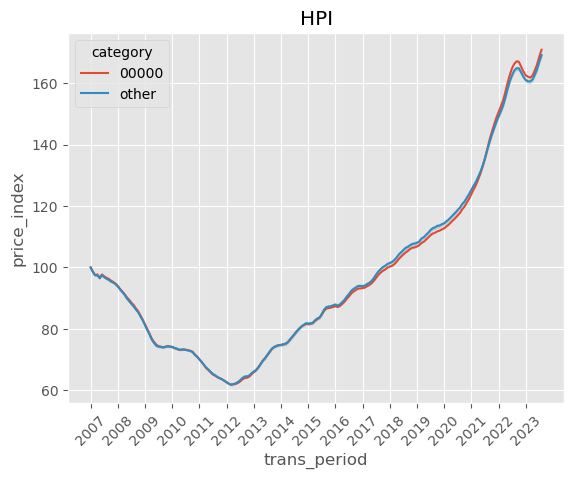

In [542]:
sns.lineplot(data=hpi_atl, x='trans_period', y='price_index', hue='category')
plt.xticks(ticks = range(1,200,12), labels = range(2007,2024), rotation=45)
plt.title('HPI')
plt.show()

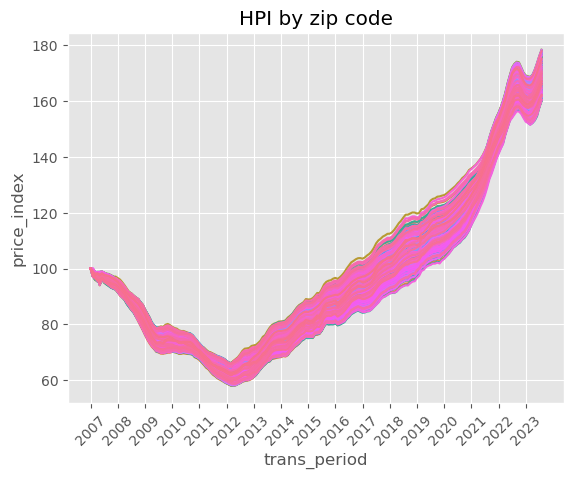

In [541]:
sns.lineplot(data=hpi_atl, x='trans_period', y='price_index', hue='census_zcta5_geoid', legend=False)
plt.xticks(ticks = range(1,200,12), labels = range(2007,2024), rotation=45)
plt.title('HPI by zip code')
plt.show()

In [239]:
# top 20 hpi zip codes as of 2023-08-01
hpi_atl.loc[hpi_atl.trans_period == 200].sort_values(by='price_index', ascending=False).head(20)

,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid,category
27555,2023-08-01,2023-08-31,200.0,0.609147,178.456730,30183,12060,other
53755,2023-08-01,2023-08-31,200.0,0.608014,178.384480,30114,12060,other
25155,2023-08-01,2023-08-31,200.0,0.610138,178.098560,30177,12060,other
41155,2023-08-01,2023-08-31,200.0,0.605104,178.004597,30188,12060,other
61355,2023-08-01,2023-08-31,200.0,0.604585,177.939507,30075,12060,other
37355,2023-08-01,2023-08-31,200.0,0.606525,177.835109,30076,12060,other
21155,2023-08-01,2023-08-31,200.0,0.608292,177.756632,30004,12060,other
54355,2023-08-01,2023-08-31,200.0,0.600819,177.740386,30189,12060,other
27755,2023-08-01,2023-08-31,200.0,0.605753,177.646871,30139,12060,other
40155,2023-08-01,2023-08-31,200.0,0.598040,177.641979,30066,12060,other


In [240]:
# bottom 20 hpi zip codes as of 2023-08-01
hpi_atl.loc[hpi_atl.trans_period == 200].sort_values(by='price_index').head(20)

,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid,category
28755,2023-08-01,2023-08-31,200.0,0.510713,160.114247,30284,12060,other
40755,2023-08-01,2023-08-31,200.0,0.508052,160.203594,30228,12060,other
53555,2023-08-01,2023-08-31,200.0,0.511224,160.287203,30223,12060,other
30755,2023-08-01,2023-08-31,200.0,0.508414,160.303711,30250,12060,other
42955,2023-08-01,2023-08-31,200.0,0.506872,160.304981,30236,12060,other
26955,2023-08-01,2023-08-31,200.0,0.506844,160.357936,30238,12060,other
36755,2023-08-01,2023-08-31,200.0,0.519189,160.473870,30206,12060,other
23355,2023-08-01,2023-08-31,200.0,0.504659,160.482047,30260,12060,other
58755,2023-08-01,2023-08-31,200.0,0.514833,160.493379,30224,12060,other
56355,2023-08-01,2023-08-31,200.0,0.515517,160.584893,30218,12060,other


In [234]:
# list of unique atl zip codes in HPI
hpi_atl_zips = hpi_atl.census_zcta5_geoid.unique().tolist()

In [203]:
# load pickle into data frame
with open(data_folder + "rpi_index.pkl","rb") as f:
    rpi_index = pickle.load(f)

In [204]:
rpi_index

,date,rental_index,census_cbsa_geoid,census_zcta5_geoid
0,2010-02-01,100.000000,17140,00000
1,2010-03-01,74.931176,17140,00000
2,2010-04-01,79.105472,17140,00000
3,2010-05-01,70.164398,17140,00000
4,2010-06-01,54.594201,17140,00000
...,...,...,...,...
1684303,2023-04-01,184.647349,49180,27105
1684304,2023-05-01,186.259023,49180,27105
1684305,2023-06-01,187.066471,49180,27105
1684306,2023-07-01,186.997432,49180,27105


In [205]:
# filter by Atlanta
rpi_atl = rpi_index.loc[rpi_index['census_cbsa_geoid'] == '12060']
print(f'rpi_atl has {rpi_atl.shape[0]} observations')
print(f'rpi_atl has {len(rpi_atl.census_zcta5_geoid.unique())} unique zip codes')
rpi_atl

rpi_atl has 39688 observations
rpi_atl has 242 unique zip codes


,date,rental_index,census_cbsa_geoid,census_zcta5_geoid
1115753,2010-01-01,100.000000,12060,00000
1115754,2010-02-01,101.219950,12060,00000
1115755,2010-03-01,99.230332,12060,00000
1115756,2010-04-01,99.896797,12060,00000
1115757,2010-05-01,101.557649,12060,00000
...,...,...,...,...
1155436,2023-04-01,189.652129,12060,30519
1155437,2023-05-01,190.192039,12060,30519
1155438,2023-06-01,190.409198,12060,30519
1155439,2023-07-01,190.369677,12060,30519


In [206]:
rpi_atl.describe()

,rental_index
count,39688.000000
mean,136.350035
std,37.848599
min,98.281076
25%,107.562619
50%,125.475127
75%,152.396402
max,587.382744


In [208]:
rpi_atl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39688 entries, 1115753 to 1155440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                39688 non-null  datetime64[ns]
 1   rental_index        39688 non-null  float64       
 2   census_cbsa_geoid   39688 non-null  object        
 3   census_zcta5_geoid  39688 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.5+ MB


In [209]:
# check for completeness of data
rpi_atl.groupby(by='date').count().sort_values(by='date')

,rental_index,census_cbsa_geoid,census_zcta5_geoid
date,,,
2010-01-01,242,242,242
2010-02-01,242,242,242
2010-03-01,242,242,242
2010-04-01,242,242,242
2010-05-01,242,242,242
...,...,...,...
2023-04-01,242,242,242
2023-05-01,242,242,242
2023-06-01,242,242,242


In [210]:
rpi_atl['category'] = rpi_atl['census_zcta5_geoid'].apply(lambda x: x if x == '00000' else 'other')

/var/folders/3z/d_msg6bj2ksf6j2jt9jvn0h80000gn/T/ipykernel_56519/112083916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpi_atl['category'] = rpi_atl['census_zcta5_geoid'].apply(lambda x: x if x == '00000' else 'other')


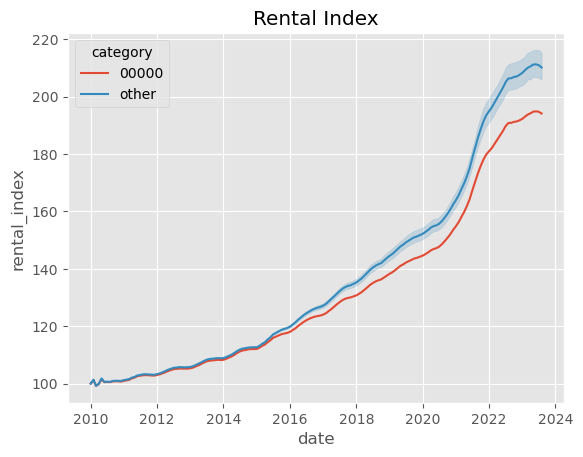

In [540]:
sns.lineplot(data=rpi_atl, x='date', y='rental_index', hue='category')
plt.title('Rental Index')
plt.show()

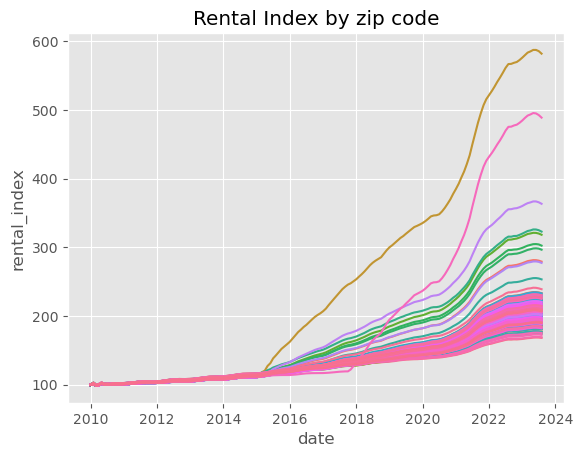

In [539]:
sns.lineplot(data=rpi_atl, x='date', y='rental_index', hue='census_zcta5_geoid', legend=False)
plt.title('Rental Index by zip code')
plt.show()

In [230]:
# top 20 rpi zip codes as of 2023-08-01
rpi_atl.loc[rpi_atl.date == '2023-08-01'].sort_values(by='rental_index', ascending=False).head(20)

,date,rental_index,census_cbsa_geoid,census_zcta5_geoid,category
1121984,2023-08-01,581.950546,12060,30680,other
1152652,2023-08-01,488.842486,12060,30224,other
1146912,2023-08-01,363.407907,12060,30117,other
1132808,2023-08-01,322.926933,12060,30363,other
1128708,2023-08-01,318.321701,12060,30012,other
1130512,2023-08-01,302.524728,12060,30120,other
1130840,2023-08-01,296.625530,12060,30028,other
1117228,2023-08-01,279.251341,12060,30014,other
1146256,2023-08-01,277.374496,12060,30047,other
1134776,2023-08-01,253.400873,12060,30179,other


In [231]:
# bottom 20 rpi zip codes as of 2023-08-01
rpi_atl.loc[rpi_atl.date == '2023-08-01'].sort_values(by='rental_index').head(20)

,date,rental_index,census_cbsa_geoid,census_zcta5_geoid,category
1116080,2023-08-01,168.233458,12060,30309,other
1153636,2023-08-01,169.166098,12060,30324,other
1153144,2023-08-01,172.610998,12060,30305,other
1133136,2023-08-01,174.147338,12060,30308,other
1152980,2023-08-01,175.314825,12060,30339,other
1134120,2023-08-01,176.365949,12060,30326,other
1117392,2023-08-01,177.077795,12060,30319,other
1136908,2023-08-01,177.109779,12060,30030,other
1122968,2023-08-01,180.518647,12060,30322,other
1138712,2023-08-01,181.071337,12060,30033,other


In [233]:
# list of unique atl zip codes in RPI
rpi_atl_zips = rpi_atl.census_zcta5_geoid.unique().tolist()

In [238]:
# check to see if unique Atlanta zips are the same for HPI and RPI
print(list(set(rpi_atl_zips) - set(hpi_atl_zips)))
print(list(set(hpi_atl_zips) - set(rpi_atl_zips)))

[]
[]


# CBSA

In [336]:
cbsa = pd.read_csv(data_folder + 'census_cbsa_zip_tract.csv', index_col = 0)
# convert zip code to string
cbsa['census_zcta5_geoid'] = cbsa['census_zcta5_geoid'].astype(str)
cbsa

,census_cbsa_geoid,census_cbsa_name,census_cbsa_lsad,census_cbsa_lat,census_cbsa_lon,census_zcta5_geoid,census_zcta5_lat,census_zcta5_lon,census_tract_geoid,census_tract_lat,census_tract_lon
0,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953800,41.245562,-86.539415
1,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953900,41.223357,-86.626671
2,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149954000,41.288932,-86.621202
3,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953700,41.349693,-86.591977
4,21780.0,"Evansville, IN-KY",M1,38.020070,-87.586166,47660,38.296067,-87.328127,18051050300,38.280515,-87.379887
...,...,...,...,...,...,...,...,...,...,...,...
93688,28940.0,"Knoxville, TN",M1,36.014791,-84.206701,37849,36.054050,-84.048488,47093006301,36.126851,-83.982097
93689,28940.0,"Knoxville, TN",M1,36.014791,-84.206701,37849,36.054050,-84.048488,47093006104,36.036152,-84.028267
93690,28940.0,"Knoxville, TN",M1,36.014791,-84.206701,37754,36.139099,-84.029801,47093006102,36.075827,-84.043041
93691,28940.0,"Knoxville, TN",M1,36.014791,-84.206701,37806,36.084693,-83.727987,47093006502,36.084693,-83.727987


In [337]:
cbsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93693 entries, 0 to 93692
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   census_cbsa_geoid   89550 non-null  float64
 1   census_cbsa_name    89550 non-null  object 
 2   census_cbsa_lsad    89550 non-null  object 
 3   census_cbsa_lat     89550 non-null  float64
 4   census_cbsa_lon     89550 non-null  float64
 5   census_zcta5_geoid  93693 non-null  object 
 6   census_zcta5_lat    93693 non-null  float64
 7   census_zcta5_lon    93693 non-null  float64
 8   census_tract_geoid  93693 non-null  int64  
 9   census_tract_lat    93693 non-null  float64
 10  census_tract_lon    93693 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.6+ MB


In [364]:
# subset for ATL
cbsa_atl = cbsa.loc[cbsa['census_cbsa_geoid'] == 12060]
cbsa_atl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 6462 to 15577
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   census_cbsa_geoid   1596 non-null   float64
 1   census_cbsa_name    1596 non-null   object 
 2   census_cbsa_lsad    1596 non-null   object 
 3   census_cbsa_lat     1596 non-null   float64
 4   census_cbsa_lon     1596 non-null   float64
 5   census_zcta5_geoid  1596 non-null   object 
 6   census_zcta5_lat    1596 non-null   float64
 7   census_zcta5_lon    1596 non-null   float64
 8   census_tract_geoid  1596 non-null   int64  
 9   census_tract_lat    1596 non-null   float64
 10  census_tract_lon    1596 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 149.6+ KB


In [365]:
# unique cbsa zip codes in 12060
len(cbsa_atl.census_zcta5_geoid.unique())

216

In [366]:
# subset and remove unecessary fields
cbsa_atl = cbsa_atl[['census_cbsa_geoid', 'census_cbsa_name', 'census_zcta5_geoid', 'census_zcta5_lat', 'census_zcta5_lon']].drop_duplicates().sort_values(by='census_zcta5_geoid')
cbsa_atl

,census_cbsa_geoid,census_cbsa_name,census_zcta5_geoid,census_zcta5_lat,census_zcta5_lon
7872,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",30002,33.773335,-84.261667
7651,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",30004,34.145635,-84.291881
11177,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",30005,34.089050,-84.217019
7332,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",30008,33.900567,-84.590924
12671,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",30009,34.078136,-84.303424
...,...,...,...,...,...
12448,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",31064,33.286454,-83.702299
14926,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",31085,33.427349,-83.627700
9162,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",31816,32.878917,-84.601310
8611,12060.0,"Atlanta-Sandy Springs-Alpharetta, GA",31822,32.864979,-84.910348


In [367]:
# list of cbsa ATL zip codes
cbsa_atl_zips = cbsa_atl.census_zcta5_geoid.unique()

In [369]:
# which zip codes are in HPI, but missing from CBSA?
print(list(set(hpi_atl_zips) - set(cbsa_atl_zips)))

['30623', '30285', '30251', '30137', '30234', '30111', '30334', '30275', '30293', '30090', '31097', '30332', '30229', '30289', '30284', '30258', '30148', '30118', '30070', '30072', '30272', '30055', '30250', '30056', '31016', '00000']


In [ ]:
'census_zcta5_geoid', 'census_zcta5_lat', 'census_zcta5_lon'

In [22]:
migration_atl = pd.read_csv('area_migration_atlanta_tract.csv', index_col = 0)
migration_atl.head()

,area,us_state_id,us_state,us_cbsa_id,us_cbsa,us_county_id,us_county,us_tract_id,us_tract,observation_start_date,observation_end_date,student_population_fraction,population,netflow_estimated,inflow_estimated,outflow_estimated,netflow_estimated_normalized,inflow_estimated_normalized,outflow_estimated_normalized,cumulative_netflow_estimated,median_income_inflow,median_income,median_income_difference,median_age_inflow,median_age,median_age_difference,confidence_score
location_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
13121005501,1192738,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13121,"Fulton County, GA",13121005501,13121005501,2023-06-01,2023-06-30,0.0877,3045,0,13,13,0,12,12,-73,46088.5742,37342,8746.5732,23.3552,30.6,-7.2448,1
13117130413,5159717,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13117,"Forsyth County, GA",13117130413,13117130413,2023-06-01,2023-06-30,0.0217,2725,5,25,20,5,23,19,315,87631.4922,47383,40248.4922,28.1005,44.9,-16.7995,1
13063040523,2666441,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13063,"Clayton County, GA",13063040523,13063040523,2023-06-01,2023-06-30,0.1003,2821,-1,15,16,-1,14,15,-121,31598.7207,43214,-11615.2783,21.2600,33.3,-12.0400,1
13089022900,3903186,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13089,"DeKalb County, GA",13089022900,13089022900,2023-06-01,2023-06-30,0.0225,4044,1,43,42,1,40,39,133,57696.6094,89792,-32095.3887,29.8097,44.4,-14.5903,1
13121007709,3497343,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13121,"Fulton County, GA",13121007709,13121007709,2023-06-01,2023-06-30,0.1179,4921,-2,21,23,-2,20,21,-8,26437.3164,86637,-60199.6836,20.9190,34.6,-13.6810,1


<Axes: xlabel='netflow_estimated', ylabel='netflow_estimated_normalized'>

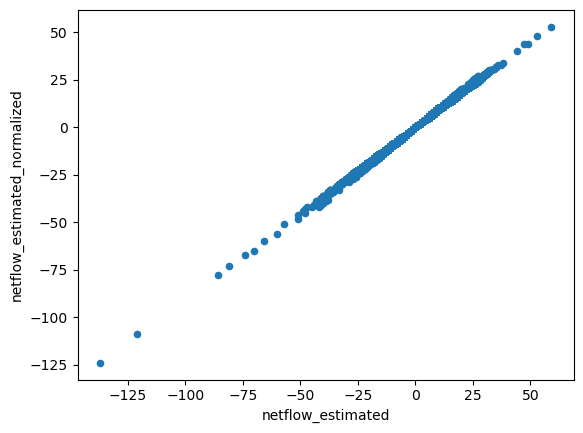

In [47]:
# netflow is net in/out
# what is netflow normalized?
migration_atl.plot.scatter('netflow_estimated', 'netflow_estimated_normalized') # x, y

In [48]:
migration_atl['observation_start_date'].unique() # from Dec 2018 to Jun 2023

array(['2023-06-01', '2023-05-01', '2023-04-01', '2023-03-01',
       '2023-02-01', '2023-01-01', '2022-12-01', '2022-11-01',
       '2022-10-01', '2022-09-01', '2022-08-01', '2022-07-01',
       '2022-06-01', '2022-05-01', '2022-04-01', '2022-03-01',
       '2022-02-01', '2022-01-01', '2021-12-01', '2021-11-01',
       '2021-10-01', '2021-09-01', '2021-08-01', '2021-07-01',
       '2021-06-01', '2021-05-01', '2021-04-01', '2021-03-01',
       '2021-02-01', '2021-01-01', '2020-12-01', '2020-11-01',
       '2020-10-01', '2020-09-01', '2020-08-01', '2020-07-01',
       '2020-06-01', '2020-05-01', '2020-04-01', '2020-03-01',
       '2020-02-01', '2020-01-01', '2019-12-01', '2019-11-01',
       '2019-10-01', '2019-09-01', '2019-08-01', '2019-07-01',
       '2019-06-01', '2019-05-01', '2019-04-01', '2019-03-01',
       '2019-02-01', '2019-01-01', '2018-12-01'], dtype=object)

In [58]:
migration_atl['observation_start_date'] = pd.to_datetime(migration_atl['observation_start_date'],
                                                         format = '%Y-%m-%d')

<Axes: xlabel='observation_start_date', ylabel='cumulative_netflow_estimated'>

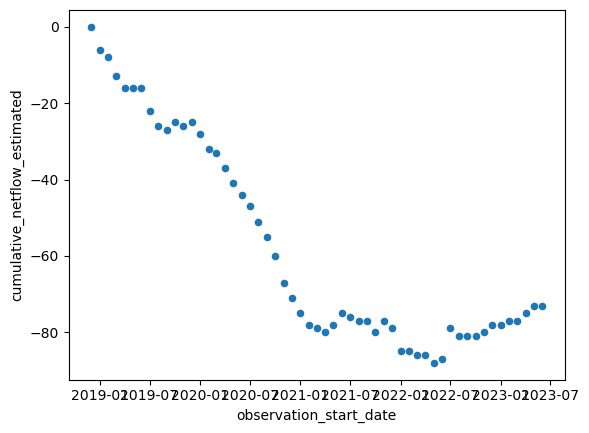

In [59]:
# sample cumulative netflow
migration_atl[migration_atl['us_tract_id'] == 13121005501]\
.plot.scatter('observation_start_date', 'cumulative_netflow_estimated')

<Axes: >

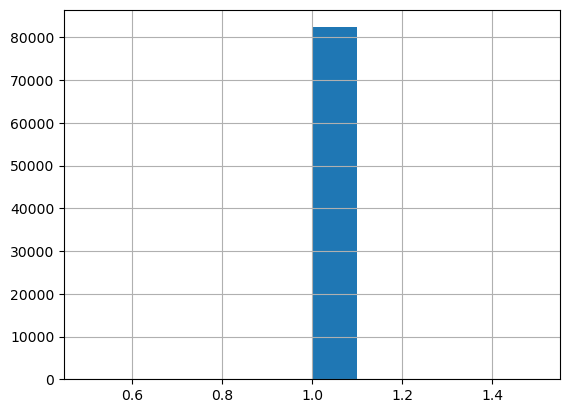

In [52]:
migration_atl['confidence_score'].hist()
# what is the confidence score?

In [9]:
migration_ga = pd.read_csv('area_migration_ga_zip.csv', index_col = 0)
migration_ga

FileNotFoundError: [Errno 2] No such file or directory: 'area_migration_ga_zip.csv'

In [24]:
migration_ga.columns

Index(['area', 'us_state_id', 'us_state', 'us_zip_id', 'us_zip',
       'observation_start_date', 'observation_end_date',
       'student_population_fraction', 'population', 'netflow_estimated',
       'inflow_estimated', 'outflow_estimated', 'netflow_estimated_normalized',
       'inflow_estimated_normalized', 'outflow_estimated_normalized',
       'cumulative_netflow_estimated', 'median_income_inflow', 'median_income',
       'median_income_difference', 'median_age_inflow', 'median_age',
       'median_age_difference', 'confidence_score'],
      dtype='object')

In [25]:
migration_atl.columns
# same columns, on zip or cbsa level

Index(['area', 'us_state_id', 'us_state', 'us_cbsa_id', 'us_cbsa',
       'us_county_id', 'us_county', 'us_tract_id', 'us_tract',
       'observation_start_date', 'observation_end_date',
       'student_population_fraction', 'population', 'netflow_estimated',
       'inflow_estimated', 'outflow_estimated', 'netflow_estimated_normalized',
       'inflow_estimated_normalized', 'outflow_estimated_normalized',
       'cumulative_netflow_estimated', 'median_income_inflow', 'median_income',
       'median_income_difference', 'median_age_inflow', 'median_age',
       'median_age_difference', 'confidence_score'],
      dtype='object')

Multi-Family Data

In [417]:
mf_occ = pd.read_csv(data_folder + "haystacks_occfile_7-26-2023.csv")
mf_rent = pd.read_csv(data_folder + "haystacks_rent_7-17-2023.csv")
mf_prop = pd.read_csv(data_folder + "PropertyFileAugust2023.csv")

# convert zip code to string
mf_prop['zipcode'] = mf_prop['zipcode'].astype(str)

In [418]:
mf_occ

,PID,Period,Occupancy
0,96_872,01/01/2015,97.9
1,96_872,02/01/2015,97.9
2,96_872,03/01/2015,97.7
3,96_872,04/01/2015,97.7
4,96_872,05/01/2015,97.7
...,...,...,...
5612304,197_1397388,02/01/2023,92.4
5612305,197_1397388,03/01/2023,92.4
5612306,197_1397388,04/01/2023,93.1
5612307,197_1397388,05/01/2023,93.1


In [419]:
mf_rent

,PID,UnitType,Period,Rent
0,1_1004,1BR,2015-01-01,473.0
1,1_1004,1BR,2015-02-01,475.0
2,1_1004,1BR,2015-03-01,474.0
3,1_1004,1BR,2015-04-01,473.0
4,1_1004,1BR,2015-05-01,472.0
...,...,...,...,...
15181753,99_97,2BR/1Bath,2023-02-01,1110.0
15181754,99_97,2BR/1Bath,2023-03-01,1108.0
15181755,99_97,2BR/1Bath,2023-04-01,1106.0
15181756,99_97,2BR/1Bath,2023-05-01,1104.0


In [420]:
mf_prop

,Market,Submarket,PID,propertyname,addressall,city,state,zipcode,Longitude,Latitude,nounits,completedyear,propertyquality,locationquality,website,ControlledAccess,FitnessCenter,businesscenter,clubhouse,coveredparking,TotalParkingSpaces,parkingtype,RentOffice,mediaroom,minstories,maxstories,ElevatorServed,wdhookup,wdinunit,SiteSizeAcres,NumberBuildings,county,ParcelComplete,mixeduse,OccupancyDate,Occupancy
0,Albany,1 - Central Albany,151_1100730,Abraxas at 90 State,90 State Street,Albany,NY,12207,-73.753301,42.649623,162,2024.0,NaN,B-,https://www.abraxasat90state.com,Yes,Yes,Yes,Yes,NaN,0.0,None,StandAlone,Y,15.0,15.0,Yes,None,All,0.38,1.0,Albany,010100-076-042-0001-005-000-0000,NaN,NaN,NaN
1,Albany,1 - Central Albany,151_1154,20 Park Residences,20 Park Street,Albany,NY,12207,-73.756933,42.650379,73,2016.0,B+,B-,NaN,Yes,Yes,No,Yes,NaN,28.0,Grade Level,StandAlone,N,5.0,5.0,Yes,None,All,0.44,1.0,Albany,76.33-1-12,No,2023-07-01,0.958904
2,Albany,1 - Central Albany,151_1171488,3rd Avenue & Elizabeth Street,3rd Avenue & Elizabeth Street,Albany,NY,12202,-73.761864,42.639730,100,NaN,NaN,C-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany,NaN,NaN,NaN,NaN
3,Albany,1 - Central Albany,151_1179,"Gallery on Holland, The",25 Holland Avenue,Albany,NY,12209,-73.771652,42.646851,60,NaN,NaN,B-,NaN,NaN,Yes,NaN,Yes,NaN,59.0,Multi-Level Structure,NaN,NaN,4.0,4.0,Yes,NaN,NaN,1.10,1.0,Albany,010100-076-047-0001-025-000-0000,NaN,NaN,NaN
4,Albany,1 - Central Albany,151_131,State Street Tower,397 State Street,Albany,NY,12210,-73.765924,42.657046,60,1925.0,C,C+,http://www.statestreettower.com/index.html,Yes,Yes,No,No,NaN,0.0,None,StandAlone,N,3.0,13.0,Yes,None,None,0.18,2.0,Albany,"65.80-3-49.1, 65.80-3-49.2",No,2023-07-01,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88460,Youngstown,9 - Austintown,153_370551,Central Park West,4661 New Hampshire Court,Youngstown,OH,44515,-80.743479,41.088290,600,1964.0,B-,C+,https://cpwaustintown.com/,No,Yes,No,Yes,NaN,805.0,Grade Level,StandAlone,N,2.0,2.0,No,Partial,None,59.86,81.0,Mahoning,"48-075-0-144.00-0 Thru 48-075-0-171.00-0, 48-0...",No,2023-07-01,0.931667
88461,Youngstown,9 - Austintown,153_378706,Four Seasons Apartments & Townhomes,4222 New Road,Austintown,OH,44515,-80.724712,41.084803,264,1969.0,C,C+,https://fourseasonsaustintown.com,No,No,No,No,NaN,347.0,Grade Level,InMgrsApart,N,2.0,3.0,No,None,None,18.47,32.0,Mahoning,"48-080-0-120.01-0, 48-080-0-153.01-0",No,2023-07-01,0.973485
88462,Youngstown,9 - Austintown,153_378707,Greenbriar Village,2230 South Raccoon Road,Austintown,OH,44515,-80.733871,41.077197,118,1970.0,B-,B-,https://livewithsimco.com/Web/property/greenbr...,No,No,No,No,NaN,222.0,Grade Level,InMgrsApart,N,2.0,2.0,No,Partial,None,7.20,9.0,Mahoning,"48-129-0-113.00-0, 48-129-0-114.00-0",No,2023-07-01,0.991525
88463,Youngstown,9 - Austintown,153_378716,Kerrybrook,1837 South Raccoon Road,Youngstown,OH,44515,-80.731648,41.078253,132,1966.0,B-,B-,https://kerrybrookaustintown.com/,Yes,Yes,No,No,NaN,140.0,Grade Level,StandAlone,N,2.0,3.0,No,All,None,8.40,16.0,Mahoning,"48-104-0-179.00-0 Thru 48-104-0-186.00-0, 48-1...",No,2023-07-01,0.886364


In [421]:
len(mf_prop.PID.unique())

88465

In [422]:
mf_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88465 entries, 0 to 88464
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Market              88465 non-null  object 
 1   Submarket           88465 non-null  object 
 2   PID                 88465 non-null  object 
 3   propertyname        88465 non-null  object 
 4   addressall          88465 non-null  object 
 5   city                88464 non-null  object 
 6   state               88465 non-null  object 
 7   zipcode             88465 non-null  object 
 8   Longitude           88462 non-null  float64
 9   Latitude            88462 non-null  float64
 10  nounits             88465 non-null  int64  
 11  completedyear       71325 non-null  float64
 12  propertyquality     66885 non-null  object 
 13  locationquality     88444 non-null  object 
 14  website             55928 non-null  object 
 15  ControlledAccess    70269 non-null  object 
 16  Fitn

In [423]:
# subset mf_prop for atlanta
mf_prop_atl = mf_prop.loc[mf_prop.zipcode.isin(hpi_atl_zips)]
mf_prop_atl

,Market,Submarket,PID,propertyname,addressall,city,state,zipcode,Longitude,Latitude,nounits,completedyear,propertyquality,locationquality,website,ControlledAccess,FitnessCenter,businesscenter,clubhouse,coveredparking,TotalParkingSpaces,parkingtype,RentOffice,mediaroom,minstories,maxstories,ElevatorServed,wdhookup,wdinunit,SiteSizeAcres,NumberBuildings,county,ParcelComplete,mixeduse,OccupancyDate,Occupancy
1230,Athens,10 - Jackson County,163_1152702,Highway 53,6275 State Route 53,Braselton,GA,30517,-83.767938,34.123718,240,NaN,NaN,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jackson,NaN,NaN,NaN,NaN
1233,Athens,10 - Jackson County,163_1297963,New Cut Road,Highway 53 & New Cut Road,Braselton,GA,30517,-83.767356,34.134158,311,NaN,NaN,B-,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,Jackson,NaN,NaN,NaN,NaN
1236,Athens,10 - Jackson County,163_1469666,Enclave at Hoschton,Highway 53 & Industrial Blvd,Hoschton,GA,30548,-83.759831,34.092092,225,NaN,NaN,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jackson,NaN,NaN,NaN,NaN
1237,Athens,10 - Jackson County,163_1471078,Broadway Avenue & Jesse Cronic Road,Broadway Avenue & Jesse Cronic Road,Braselton,GA,30517,-83.766084,34.109267,101,NaN,NaN,B-,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jackson,NaN,NaN,NaN,NaN
1238,Athens,10 - Jackson County,163_1476134,Seller's Mill Tributary Townhomes,1688 Highway 53,Hoschton,GA,30548,-83.735184,34.074791,404,NaN,NaN,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grade Level,NaN,NaN,2.0,2.0,No,NaN,NaN,NaN,NaN,Jackson,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,Atlanta - Urban,9 - West End/Fairlie Poplar/Underground,22_939339,"Victory at Summerhill, The",100 Fulton Street SE,Atlanta,GA,30312,-84.385581,33.742171,276,2021.0,A-,C,https://www.victoryatsummerhill.com/,Yes,Yes,No,Yes,NaN,347.0,Multi-Level Structure,StandAlone,NaN,5.0,6.0,Yes,None,All,5.00,3.0,Fulton,14 005300042215,No,2023-07-01,0.786232
3993,Atlanta - Urban,9 - West End/Fairlie Poplar/Underground,22_9808,Platform at Grant Park,290 Martin Luther King Jr. Drive SE,Atlanta,GA,30312,-84.378443,33.747648,324,2019.0,A,C+,https://platformgrantpark.com/,Yes,Yes,Yes,Yes,NaN,550.0,Multi-Level Structure,StandAlone,Y,3.0,5.0,Yes,Partial,Partial,3.93,1.0,Fulton,14-0052-0010-012-1,No,2023-07-01,0.922840
44823,Macon,33 - Forsyth,137_1471689,Johnston Street Townhomes,North Harris Street & East Johnston Street,Forsyth,GA,31029,-83.936830,33.034948,100,NaN,NaN,C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monroe,NaN,NaN,NaN,NaN
44824,Macon,33 - Forsyth,137_1477847,H & H Timberlands,Johnstonville Road & Rocky Creek Road,Forsyth,GA,31029,-84.022528,33.112524,100,NaN,NaN,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monroe,NaN,NaN,NaN,NaN


In [424]:
# create list of PIDs
mf_atl_pids = mf_prop_atl.PID.unique().tolist()

In [427]:
# subset mf_rent to only show Atlanta properties
mf_rent_atl = mf_rent.loc[mf_rent.PID.isin(mf_atl_pids)]
mf_rent_atl

,PID,UnitType,Period,Rent
2797733,137_167,1BR,2015-10-01,550.0
2797734,137_167,1BR,2015-11-01,550.0
2797735,137_167,1BR,2015-12-01,550.0
2797736,137_167,1BR,2016-01-01,550.0
2797737,137_167,1BR,2016-02-01,550.0
...,...,...,...,...
5091959,24_99,3BR+,2023-02-01,1932.5
5091960,24_99,3BR+,2023-03-01,1926.5
5091961,24_99,3BR+,2023-04-01,1920.5
5091962,24_99,3BR+,2023-05-01,1914.5


In [428]:
print(len(mf_rent_atl.PID.unique()), 'unique properties in mf_rent_atl')

1920 unique properties in mf_rent_atl


In [429]:
# merge with zip code
mf_rent_atl = mf_rent_atl.merge(mf_prop_atl[['PID', 'zipcode']], on='PID')
mf_rent_atl

,PID,UnitType,Period,Rent,zipcode
0,137_167,1BR,2015-10-01,550.0,31029
1,137_167,1BR,2015-11-01,550.0,31029
2,137_167,1BR,2015-12-01,550.0,31029
3,137_167,1BR,2016-01-01,550.0,31029
4,137_167,1BR,2016-02-01,550.0,31029
...,...,...,...,...,...
470535,24_99,3BR+,2023-02-01,1932.5,30228
470536,24_99,3BR+,2023-03-01,1926.5,30228
470537,24_99,3BR+,2023-04-01,1920.5,30228
470538,24_99,3BR+,2023-05-01,1914.5,30228


In [430]:
# create list of zip codes in mf_rent
mf_rent_atl_zips = mf_rent_atl.zipcode.unique().tolist()
print(len(mf_rent_atl_zips), 'unique zip codes in MF Rent data')

147 unique zip codes in MF Rent data


In [442]:
# subset mf_occ to only show Atlanta properties 
mf_occ_atl = mf_occ.loc[mf_occ.PID.isin(mf_atl_pids)]
mf_occ_atl

,PID,Period,Occupancy
1825989,163_928824,08/01/2020,98.4
1825990,163_928824,09/01/2020,98.4
1825991,163_928824,10/01/2020,98.8
1825992,163_928824,11/01/2020,98.8
1825993,163_928824,12/01/2020,98.8
...,...,...,...
4753945,24_1417723,06/01/2023,87.7
4753946,24_1476206,04/01/2023,100.0
4753947,24_1476206,05/01/2023,100.0
4753948,24_1476206,06/01/2023,100.0


In [443]:
print(len(mf_occ_atl.PID.unique()), 'unique properties in mf_occ_atl')

1797 unique properties in mf_occ_atl


In [444]:
# merge with zip code
mf_occ_atl = mf_occ_atl.merge(mf_prop_atl[['PID', 'zipcode', 'nounits']], on='PID').sort_values(by='nounits')
mf_occ_atl

,PID,Period,Occupancy,zipcode,nounits
153741,24_1395213,10/01/2021,90.0,30263,50
151258,24_1395123,03/01/2023,86.4,30011,50
151259,24_1395123,04/01/2023,86.4,30011,50
151260,24_1395123,05/01/2023,86.4,30011,50
151261,24_1395123,06/01/2023,86.4,30011,50
...,...,...,...,...,...
41772,22_4666,01/01/2021,95.0,30080,1738
41773,22_4666,02/01/2021,94.8,30080,1738
41774,22_4666,03/01/2021,94.5,30080,1738
41764,22_4666,05/01/2020,92.9,30080,1738


In [445]:
# create list of zip codes in mf_rent
mf_occ_atl_zips = mf_occ_atl.zipcode.unique().tolist()
print(len(mf_occ_atl_zips), 'unique zip codes in MF Occ data')

146 unique zip codes in MF Occ data


In [451]:
all_zips = list(set(mf_occ_atl_zips + mf_rent_atl_zips + hpi_atl_zips))

In [452]:
print(all_zips)

['31830', '30251', '30215', '30322', '30187', '30014', '30622', '30044', '30111', '30334', '30297', '30107', '30275', '30263', '30005', '30229', '30043', '30307', '30308', '30260', '30284', '30305', '30341', '30349', '30041', '30306', '30096', '30047', '30135', '30258', '30170', '30171', '30216', '30268', '30161', '30132', '30088', '30337', '30118', '30045', '30206', '30536', '30116', '30094', '30363', '30650', '30066', '30182', '30518', '30240', '30253', '30080', '30313', '30126', '30076', '30028', '30127', '30079', '30108', '30013', '30269', '30345', '30134', '30217', '30680', '30062', '00000', '30338', '30623', '30290', '30655', '30040', '30025', '30230', '30103', '30009', '30179', '30312', '30621', '30114', '30517', '30184', '30259', '30032', '30339', '30248', '30656', '30188', '31024', '30017', '30295', '30317', '30189', '31097', '30082', '30153', '30332', '30120', '30310', '30175', '30506', '30030', '30101', '30046', '30314', '30316', '30070', '30113', '30296', '30122', '30218', 

In [490]:
# create dataframe with all zips
data_ = {'zipcode':all_zips}
zip_map = pd.DataFrame(data_)

In [491]:
zip_map['single_family'] = zip_map.zipcode.apply(lambda x: True if x in hpi_atl_zips else False)
zip_map['mf_rent'] = zip_map.zipcode.apply(lambda x: True if x in mf_rent_atl_zips else False)
zip_map['mf_occ'] = zip_map.zipcode.apply(lambda x: True if x in mf_occ_atl_zips else False)
zip_map

,zipcode,single_family,mf_rent,mf_occ
0,31830,True,False,False
1,30251,True,False,False
2,30215,True,True,True
3,30322,True,False,False
4,30187,True,False,False
...,...,...,...,...
237,31038,True,False,False
238,30291,True,True,True
239,31016,True,False,False
240,30168,True,True,True


In [492]:
def zip_color_assign(row):
    if row['mf_rent']:
        if row['mf_occ']:
            return 'All Data'
        else:
            return 'SF / MF Rent Only'
    elif row['mf_occ']:
        return 'SF / MF Occ Only'
    else:
        return 'SF Only'

In [493]:
def zip_color_assign2(row):
    if row['mf_rent']:
        if row['mf_occ']:
            return 'green'
        else:
            return 'yellow'
    elif row['mf_occ']:
        return 'orange'
    else:
        return 'red'

In [494]:
zip_map['data'] = zip_map.apply(zip_color_assign, axis=1)
zip_map

,zipcode,single_family,mf_rent,mf_occ,data
0,31830,True,False,False,SF Only
1,30251,True,False,False,SF Only
2,30215,True,True,True,All Data
3,30322,True,False,False,SF Only
4,30187,True,False,False,SF Only
...,...,...,...,...,...
237,31038,True,False,False,SF Only
238,30291,True,True,True,All Data
239,31016,True,False,False,SF Only
240,30168,True,True,True,All Data


In [495]:
zip_map['color'] = zip_map.apply(zip_color_assign2, axis=1)
zip_map

,zipcode,single_family,mf_rent,mf_occ,data,color
0,31830,True,False,False,SF Only,red
1,30251,True,False,False,SF Only,red
2,30215,True,True,True,All Data,green
3,30322,True,False,False,SF Only,red
4,30187,True,False,False,SF Only,red
...,...,...,...,...,...,...
237,31038,True,False,False,SF Only,red
238,30291,True,True,True,All Data,green
239,31016,True,False,False,SF Only,red
240,30168,True,True,True,All Data,green


In [496]:
# merge with Lat and Lon, inner
zip_map = zip_map.merge(cbsa_atl[['census_zcta5_geoid', 'census_zcta5_lat', 'census_zcta5_lon']], left_on='zipcode', right_on='census_zcta5_geoid').sort_values(by='census_zcta5_geoid')

In [497]:
zip_map

,zipcode,single_family,mf_rent,mf_occ,data,color,census_zcta5_geoid,census_zcta5_lat,census_zcta5_lon
192,30002,True,True,True,All Data,green,30002,33.773335,-84.261667
152,30004,True,True,True,All Data,green,30004,34.145635,-84.291881
10,30005,True,True,True,All Data,green,30005,34.089050,-84.217019
119,30008,True,True,True,All Data,green,30008,33.900567,-84.590924
65,30009,True,True,True,All Data,green,30009,34.078136,-84.303424
...,...,...,...,...,...,...,...,...,...
100,31064,True,False,False,SF Only,red,31064,33.286454,-83.702299
179,31085,True,False,False,SF Only,red,31085,33.427349,-83.627700
108,31816,True,False,True,SF / MF Occ Only,orange,31816,32.878917,-84.601310
205,31822,True,False,False,SF Only,red,31822,32.864979,-84.910348


In [488]:
# 30334 has all data, but no lat/long

In [508]:
# create map
m_ = folium.Map(location=[20,25], tiles="OpenStreetMap", zoom_start=2)

# add circles to the map
for i in range(0,len(zip_map)):
    folium.Circle(
        location=[zip_map.iloc[i]['census_zcta5_lat'], zip_map.iloc[i]['census_zcta5_lon']],
        popup=f'{zip_map.iloc[i]["zipcode"]}: {zip_map.iloc[i]["data"]}',
        radius=1000,
        color=zip_map.iloc[i]['color'],
        fill=True,
        fill_color=zip_map.iloc[i]['color']
    ).add_to(m_)

# save as HTML file and preview    
m_.save('m_.html')
m_

## Feature Engineering - Occupancy by Zip Code

In [510]:
mf_occ_atl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160141 entries, 153741 to 41751
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   PID        160141 non-null  object 
 1   Period     160141 non-null  object 
 2   Occupancy  160141 non-null  float64
 3   zipcode    160141 non-null  object 
 4   nounits    160141 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 7.3+ MB


In [516]:
mf_occ_atl.describe()

,Occupancy,nounits
count,160141.000000,160141.000000
mean,93.821615,250.078768
std,7.043891,145.107960
min,0.000000,50.000000
25%,92.800000,146.000000
50%,95.100000,233.000000
75%,97.200000,320.000000
max,100.000000,1738.000000


In [517]:
mf_occ_atl['Period'] = pd.to_datetime(mf_occ_atl.Period)
mf_occ_atl['Occupancy'] = mf_occ_atl['Occupancy']/100

In [522]:
mf_occ_atl['occupied_units'] = mf_occ_atl['Occupancy'] * mf_occ_atl['nounits']

In [523]:
mf_occ_atl

,PID,Period,Occupancy,zipcode,nounits,occupied_units
153741,24_1395213,2021-10-01,0.900,30263,50,45.000
151258,24_1395123,2023-03-01,0.864,30011,50,43.200
151259,24_1395123,2023-04-01,0.864,30011,50,43.200
151260,24_1395123,2023-05-01,0.864,30011,50,43.200
151261,24_1395123,2023-06-01,0.864,30011,50,43.200
...,...,...,...,...,...,...
41772,22_4666,2021-01-01,0.950,30080,1738,1651.100
41773,22_4666,2021-02-01,0.948,30080,1738,1647.624
41774,22_4666,2021-03-01,0.945,30080,1738,1642.410
41764,22_4666,2020-05-01,0.929,30080,1738,1614.602


In [528]:
mf_occ_atl = mf_occ_atl.groupby(['zipcode', 'Period'], as_index=False)[['nounits','occupied_units']].sum()
mf_occ_atl['occupancy_by_zip'] = mf_occ_atl['occupied_units'] / mf_occ_atl['nounits']

In [552]:
mf_occ_atl

,zipcode,Period,nounits,occupied_units,occupancy_by_zip
0,30002,2015-01-01,592,538.940,0.910372
1,30002,2015-02-01,592,538.940,0.910372
2,30002,2015-03-01,592,540.248,0.912581
3,30002,2015-04-01,592,537.196,0.907426
4,30002,2015-05-01,592,537.196,0.907426
...,...,...,...,...,...
14329,31816,2023-02-01,51,47.022,0.922000
14330,31816,2023-03-01,51,47.022,0.922000
14331,31816,2023-04-01,51,47.022,0.922000
14332,31816,2023-05-01,51,47.022,0.922000


In [530]:
mf_occ_atl.describe()

,nounits,occupied_units,occupancy_by_zip
count,14334.000000,14334.000000,14334.000000
mean,2793.907074,2612.080936,0.939638
std,2834.442399,2644.115658,0.032294
min,50.000000,43.200000,0.291000
25%,712.000000,647.098000,0.928349
50%,1693.000000,1586.378500,0.944559
75%,4005.000000,3714.553750,0.957016
max,14047.000000,13208.047000,1.000000


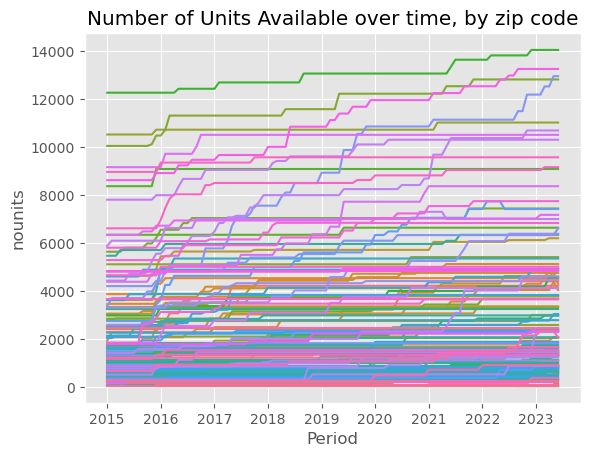

In [537]:
sns.lineplot(data=mf_occ_atl, x='Period', y='nounits', hue='zipcode', legend=False)
plt.title('Number of Units Available over time, by zip code')
plt.show()

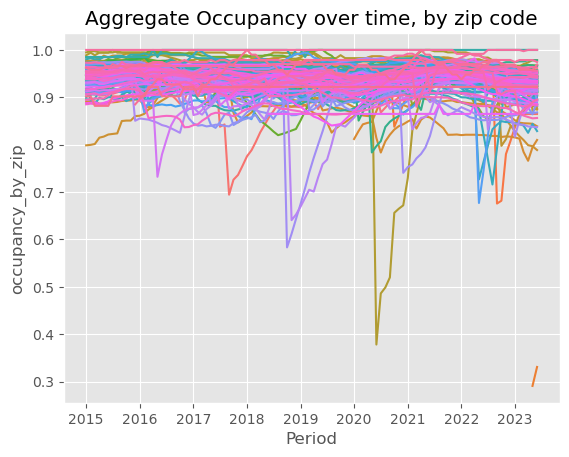

In [538]:
sns.lineplot(data=mf_occ_atl, x='Period', y='occupancy_by_zip', hue='zipcode', legend=False)
plt.title('Aggregate Occupancy over time, by zip code')
plt.show()

In [550]:
mf_occ_atl.loc[mf_occ_atl['zipcode']=='30046'].tail(40)

,zipcode,Period,nounits,occupied_units,occupancy_by_zip
2663,30046,2020-03-01,176,172.948,0.982659
2664,30046,2020-04-01,176,172.948,0.982659
2665,30046,2020-05-01,176,172.948,0.982659
2666,30046,2020-06-01,606,229.278,0.378347
2667,30046,2020-07-01,606,294.638,0.486201
2668,30046,2020-08-01,606,302.224,0.498719
2669,30046,2020-09-01,606,315.124,0.520007
2670,30046,2020-10-01,606,397.684,0.656244
2671,30046,2020-11-01,606,402.964,0.664957
2672,30046,2020-12-01,606,407.264,0.672053
